### Making graphs

In [4]:
# Install packages
#pip install pandas openpyxl matplotlib cartopy 
#pip install scipy

In [1]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import matplotlib.cm as cm
from scipy.stats import gaussian_kde
import os
from scipy.stats import linregress
import matplotlib.dates as mdates

In [2]:
# Loading data
data = pd.read_excel("Data/Data_final.xlsx") 

# Display the first 5 rows
print(data.head())

metadata = pd.read_excel("Data/Metadata_final.xlsx") 

# Display the first 5 rows  
print(metadata.head())

CTD_points = pd.read_excel("Data/Coordinates_CTD.xlsx") 

# Display the first 5 rows  
print(CTD_points.head())

         Sample_Name  SeaDistance_m Location Duplicate    Datetime   Latitude  \
0  SLWT_2024_01_19_A            NaN    shore         A  2024_01_19  16.625000   
1  SLWT_2024_01_19_B            NaN    shore         B  2024_01_19  16.625000   
2  SLWT_2024_01_20_A            NaN    shore         A  2024_01_20  16.401667   
3  SLWT_2024_01_20_B            NaN    shore         B  2024_01_20  16.401667   
4  SLWT_2024_01_21_A            NaN    shore         A  2024_01_21  16.316667   

   Longitude  Type  HP_12CH4_dry_mean  HR_12CH4_dry_mean  ...  AirT_degC  \
0 -25.325000   NaN           1.854859           1.838359  ...       24.5   
1 -25.325000   NaN           1.729128           1.715480  ...       24.5   
2 -27.518333   NaN           1.827733           1.818951  ...       23.5   
3 -27.518333   NaN           1.892697           1.893364  ...       23.5   
4 -30.581667   NaN           1.902200           1.882740  ...       25.0   

   AirP_hPa  CH4atm_ppm  CO2atm_ppm  d13C_CH4atm_permil 

### Map of the sampling sites

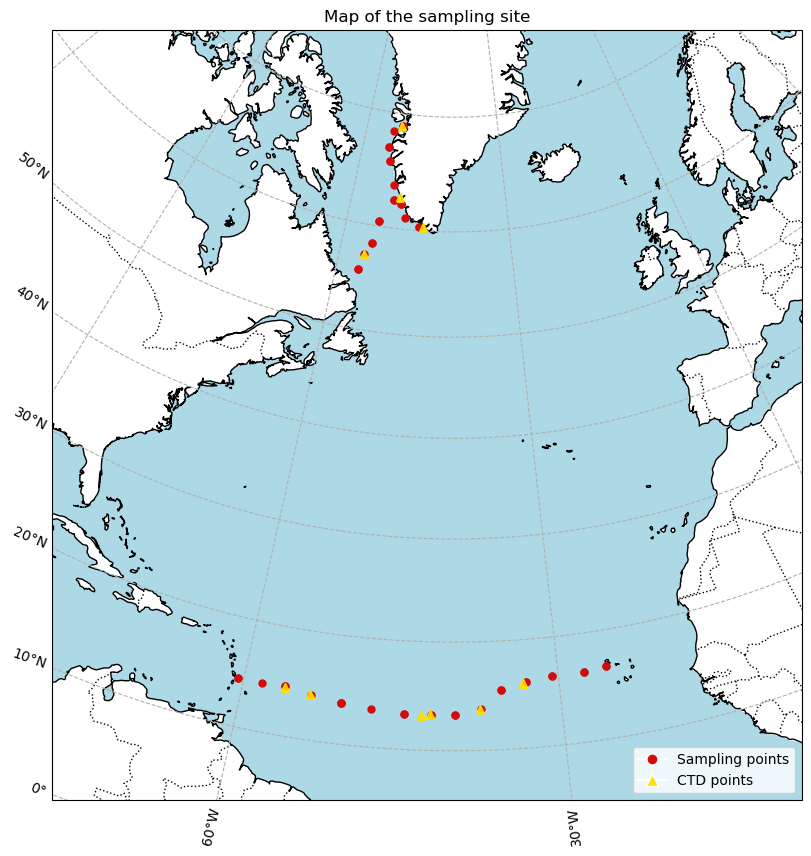

In [3]:
gps_points = list(zip(data["Longitude"], data["Latitude"]))
gps_ctd_points = list(zip(CTD_points["Long [décimal]"], CTD_points["Lat [décimal]"]))

# Create the figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Plot the GPS points
for lon, lat in gps_points:
    ax.plot(lon, lat, marker='o', markersize=5, color='#d50b0b', transform=ccrs.PlateCarree())

for lon, lat in gps_ctd_points:
    ax.plot(lon, lat, marker='^', markersize=6, alpha = 0.9, color='#ffe000', transform=ccrs.PlateCarree())

# Set up the elements of the legend manually
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Sampling points',
           markerfacecolor='#d50b0b', markersize=8),
    Line2D([0], [0], marker='^', color='w', label='CTD points',
           markerfacecolor='#ffe000', markersize=9)
]

# Add the legend
ax.legend(handles=legend_elements, loc='lower right')

# Add title
plt.title("Map of the sampling site")

# Export as an image
plt.savefig(os.path.join('Results', 'Sampling_site.png' ), bbox_inches='tight', dpi=150)

# Show the plot
plt.show()

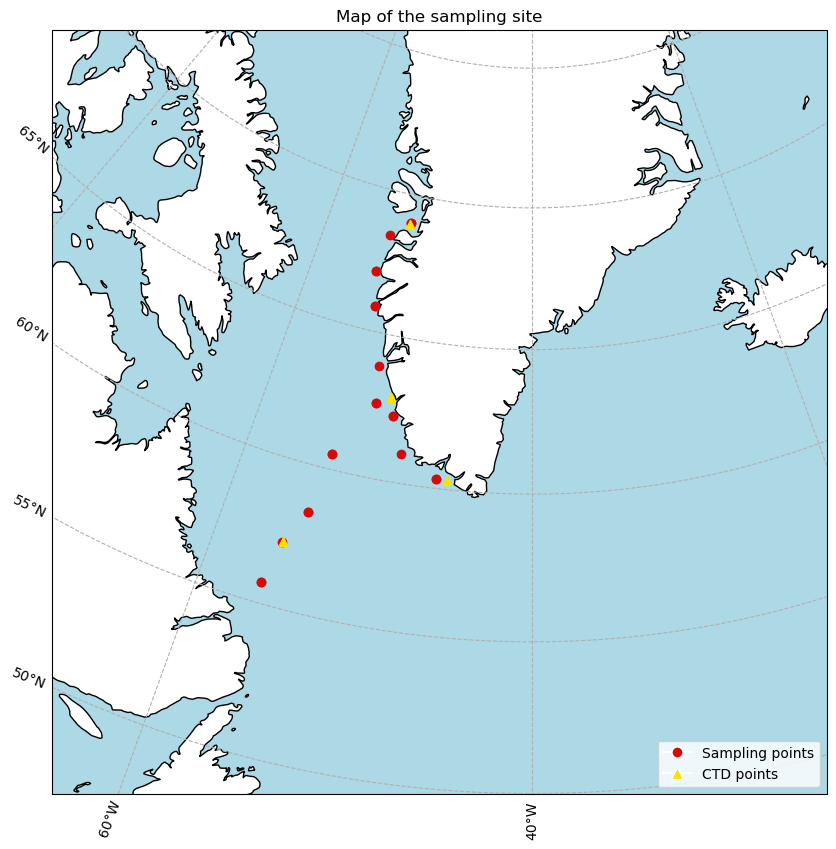

In [4]:
# Focus on the Artic for better precision
# Create the figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo(central_longitude=-40, true_scale_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-65, -25, 50, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Plot the GPS points
for lon, lat in gps_points:
    ax.plot(lon, lat, marker='o', markersize=6, color='#d50b0b', transform=ccrs.PlateCarree())

for lon, lat in gps_ctd_points:
    ax.plot(lon, lat, marker='^', markersize=6, alpha = 1, color='#ffe000', transform=ccrs.PlateCarree())

# Set up the elements of the legend manually
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Sampling points',
           markerfacecolor='#d50b0b', markersize=8),
    Line2D([0], [0], marker='^', color='w', label='CTD points',
           markerfacecolor='#ffe000', markersize=9)
]

# Add the legend
ax.legend(handles=legend_elements, loc='lower right')

# Add title
plt.title("Map of the sampling site")

# Export as an image
plt.savefig(os.path.join('Results', 'Sampling_site_Greenland.png' ), bbox_inches='tight', dpi=150)

# Show the plot
plt.show()

## Plot of atm concentration

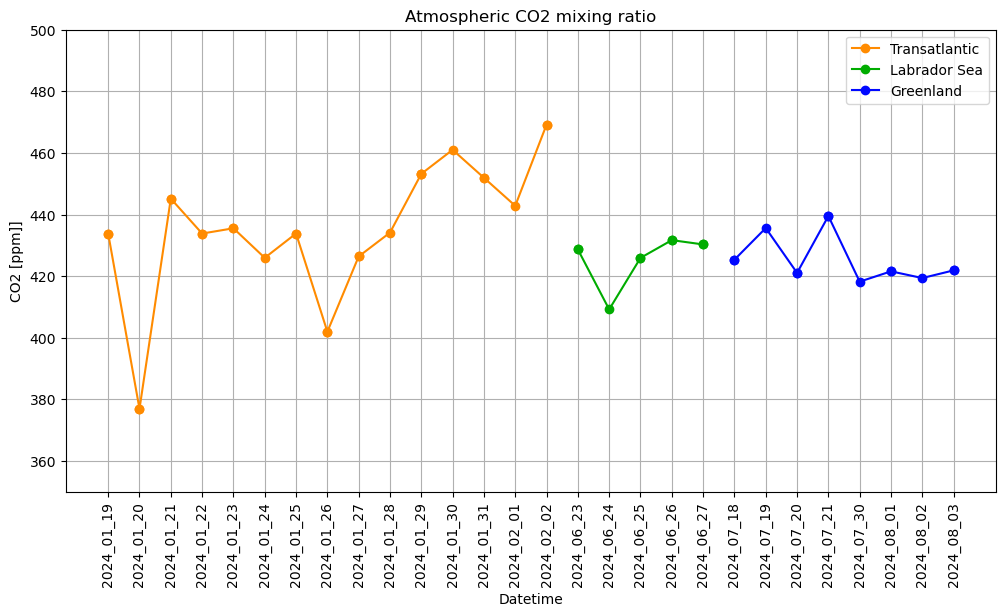

In [14]:
# Overall CO2 atm [ppm]

plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'][:27], data['CO2atm_ppm'][:27], marker='o', color = '#ff8b00', label='Transatlantic', zorder = 2)
plt.plot(data['Datetime'][27:36], data['CO2atm_ppm'][27:36], marker='o', color = '#00ac00', label='Labrador Sea', zorder = 2)
plt.plot(data['Datetime'][36:], data['CO2atm_ppm'][36:], marker='o', color = '#0008ff', label='Greenland', zorder = 2)

plt.title('Atmospheric CO2 mixing ratio')
plt.xlabel('Datetime')
plt.ylabel('CO2 [ppm]]')
plt.ylim(350, 500)
plt.xticks(rotation=90)
plt.grid(True, zorder=0)
plt.legend()

# Export as an image
plt.savefig(os.path.join('Results', 'Atm_CO2.png' ), bbox_inches='tight', dpi=150)

plt.show()

In [12]:
# ppm into ppb
CH4atm_ppb = data['CH4atm_ppm'] * 10**3
print(CH4atm_ppb)

0     1833.592886
1     1833.592886
2     1689.915889
3     1689.915889
4     1867.134703
5     1867.134703
6     1873.170059
7     1873.170059
8     1881.703088
9     1881.703088
10    1860.999628
11    1833.592886
12    1833.592886
13    1815.572231
14    1815.572231
15    1849.007110
16    1849.007110
17    1858.802862
18    1856.549049
19    1856.549049
20    1856.549049
21    1809.374346
22    1794.993336
23    1794.993336
24    1780.612326
25    1860.273341
26    1860.273341
27    1905.545307
28    1905.545307
29    1812.615439
30    1920.045508
31    1920.045508
32    1908.500479
33    1908.500479
34    1908.391420
35    1908.391420
36    1891.095386
37    1891.095386
38    1897.102312
39    1931.296354
40    1931.296354
41    1774.546114
42    1774.546114
43    1897.234380
44    1926.345178
45    1926.345178
46    1918.827070
47    1850.919519
48    1850.919519
Name: CH4atm_ppm, dtype: float64


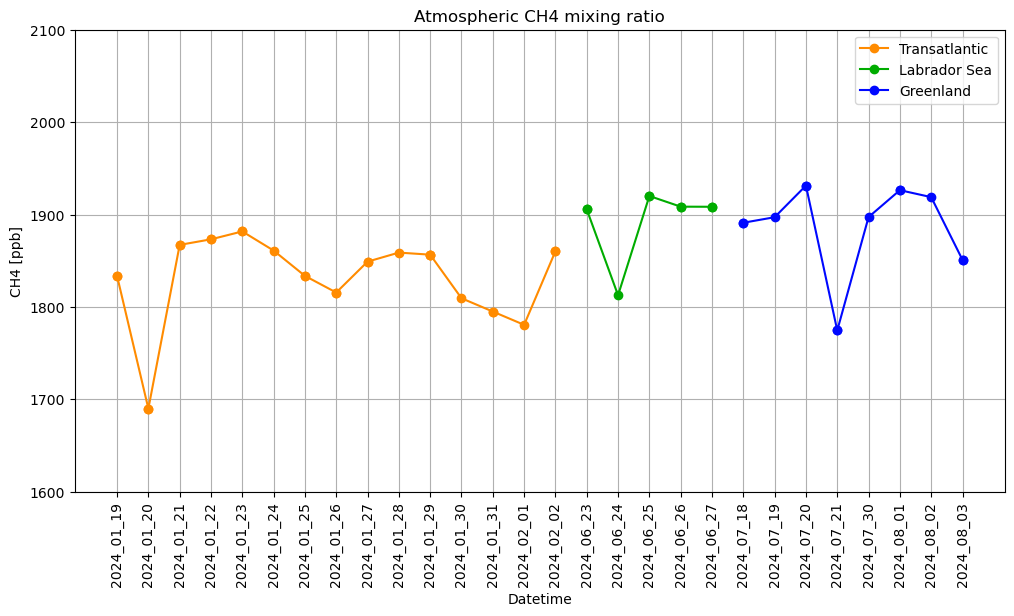

In [13]:
# Overall CH4 atm [ppm]

plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'][:27], CH4atm_ppb[:27], marker='o', color = '#ff8b00', label='Transatlantic', zorder = 2)
plt.plot(data['Datetime'][27:36], CH4atm_ppb[27:36], marker='o', color = '#00ac00', label='Labrador Sea', zorder = 2)
plt.plot(data['Datetime'][36:], CH4atm_ppb[36:], marker='o', color = '#0008ff', label='Greenland', zorder = 2)

plt.title('Atmospheric CH4 mixing ratio')
plt.xlabel('Datetime')
plt.ylabel('CH4 [ppb]')
plt.ylim(1600, 2100)
plt.xticks(rotation=90)
plt.grid(True, zorder=0)
plt.legend()

# Export as an image
plt.savefig(os.path.join('Results', 'Atm_CH4_ppb.png' ), bbox_inches='tight', dpi=150)

plt.show()

## Map of atmospehric concentration

C:\Users\lolap\AppData\Local\Temp\ipykernel_30976\3815650678.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('OrRd')


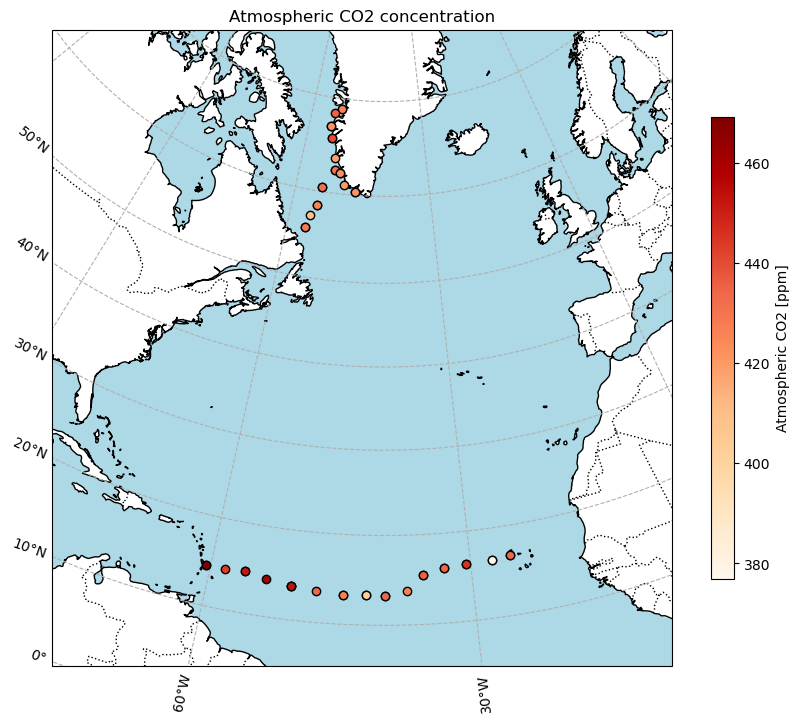

In [8]:
# Atmospheric CO2 

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Normalize the concentration values for color scaling
norm = mcolors.Normalize(vmin=data['CO2atm_ppm'].min(), vmax=data['CO2atm_ppm'].max())
colormap = cm.get_cmap('OrRd')

# Plot the GPS points with color depending on concentration
for _, row in data.iterrows():
    rgba = colormap(norm(row['CO2atm_ppm']))  # Get the color based on concentration
    hex_color = mcolors.to_hex(rgba)  # Convert to hex color
    ax.plot(row['Longitude'], row['Latitude'], marker='o',  markeredgecolor = 'black', markersize=6, color=hex_color, transform=ccrs.PlateCarree())

# Add colorbar legend
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Needed only for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label('Atmospheric CO2 [ppm]')

# Add title
plt.title("Atmospheric CO2 concentration")

# Export as an image
plt.savefig(os.path.join('Results', 'Map_atm_CO2.png' ), bbox_inches='tight', dpi=150)

# Show the plot
plt.show()

C:\Users\lolap\AppData\Local\Temp\ipykernel_30976\1263497226.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('OrRd')


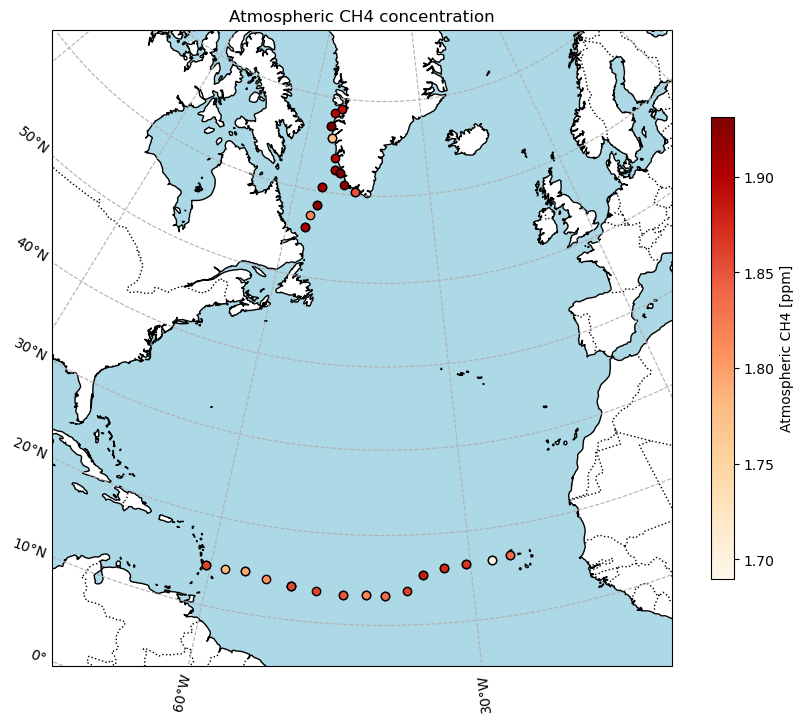

In [9]:
# Atmospheric CH4

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Normalize the concentration values for color scaling
norm = mcolors.Normalize(vmin=data['CH4atm_ppm'].min(), vmax=data['CH4atm_ppm'].max())
colormap = cm.get_cmap('OrRd')

# Plot the GPS points with color depending on concentration
for _, row in data.iterrows():
    rgba = colormap(norm(row['CH4atm_ppm']))  # Get the color based on concentration
    hex_color = mcolors.to_hex(rgba)  # Convert to hex color
    ax.plot(row['Longitude'], row['Latitude'], marker='o', markersize=6,  markeredgecolor = 'black', color=hex_color, transform=ccrs.PlateCarree())

# Add colorbar legend
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Needed only for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label('Atmospheric CH4 [ppm]')

# Add title
plt.title("Atmospheric CH4 concentration")

# Export as an image
plt.savefig(os.path.join('Results', 'Map_atm_Ch4.png' ), bbox_inches='tight', dpi=150)

# Show the plot
plt.show()

## Plot CO2/CH4 concentration in the water

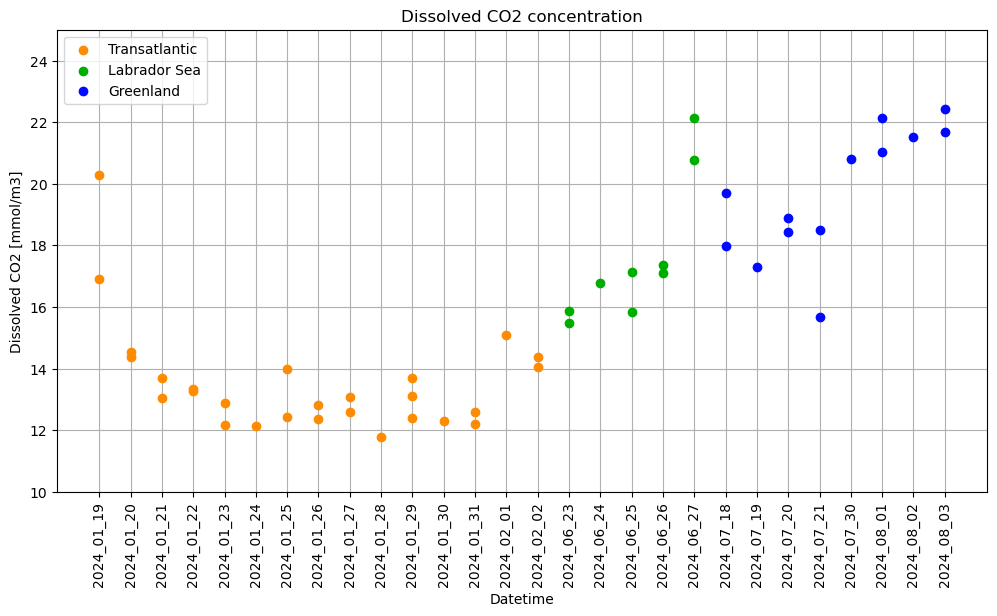

In [10]:
#Overall dissolved CO2 concentration
plt.figure(figsize=(12, 6))
plt.scatter(data['Datetime'][:27], data['co2_mmolm3'][:27], marker='o', color = '#ff8b00', label='Transatlantic', zorder = 2)
plt.scatter(data['Datetime'][27:36], data['co2_mmolm3'][27:36], marker='o', color = '#00ac00', label='Labrador Sea', zorder = 2)
plt.scatter(data['Datetime'][36:], data['co2_mmolm3'][36:], marker='o', color = '#0008ff', label='Greenland', zorder = 2)

plt.title('Dissolved CO2 concentration')
plt.xlabel('Datetime')
plt.ylabel('Dissolved CO2 [mmol/m3]')
plt.ylim(10,25)
plt.xticks(rotation=90)
plt.grid(True, zorder=0)
plt.legend(loc = 'upper left')

# Export as an image
#plt.savefig(os.path.join('Results', 'Dissolved_CO2.png' ), bbox_inches='tight', dpi=150)

plt.show()

In [15]:
#change of units: mmol/m3 --> umol/m3
data['ch4_umolm3'] = data['ch4_mmolm3'] * 10**3 
display(data)

,Sample_Name,SeaDistance_m,Location,Duplicate,Datetime,Latitude,Longitude,Type,HP_12CH4_dry_mean,HR_12CH4_dry_mean,...,AirP_hPa,CH4atm_ppm,CO2atm_ppm,d13C_CH4atm_permil,d13C_CO2atm_permil,ch4_mmolm3,d13_ch4_permil,co2_mmolm3,d13_co2_permil,ch4_umolm3
0,SLWT_2024_01_19_A,NaN,shore,A,2024_01_19,16.625000,-25.325000,NaN,1.854859,1.838359,...,1016.0,1.833593,433.836759,-56.921563,-9.915523,0.003094,-29.987498,16.892198,-12.015241,3.094427
1,SLWT_2024_01_19_B,NaN,shore,B,2024_01_19,16.625000,-25.325000,NaN,1.729128,1.715480,...,1016.0,1.833593,433.836759,-56.921563,-9.915523,0.001184,-26.618731,20.277302,-13.662855,1.183733
2,SLWT_2024_01_20_A,NaN,shore,A,2024_01_20,16.401667,-27.518333,NaN,1.827733,1.818951,...,1014.7,1.689916,376.896303,-54.962662,-10.123835,0.004307,-69.069969,14.367822,-10.170162,4.306603
3,SLWT_2024_01_20_B,NaN,shore,B,2024_01_20,16.401667,-27.518333,NaN,1.892697,1.893364,...,1014.7,1.689916,376.896303,-54.962662,-10.123835,0.005311,-65.442072,14.534114,-6.163134,5.311199
4,SLWT_2024_01_21_A,NaN,shore,A,2024_01_21,16.316667,-30.581667,NaN,1.902200,1.882740,...,1014.9,1.867135,445.163458,-55.929852,-10.818008,0.003139,-74.970404,13.034787,-8.446975,3.139319
5,SLWT_2024_01_21_B,NaN,shore,B,2024_01_21,16.316667,-30.581667,NaN,1.898429,1.891481,...,1014.9,1.867135,445.163458,-55.929852,-10.818008,0.003167,-68.860766,13.705572,-5.313740,3.166583
6,SLWT_2024_01_22_A,NaN,shore,A,2024_01_22,16.036667,-33.103333,NaN,1.867305,1.871624,...,1017.0,1.873170,433.821349,-54.967832,-10.432197,0.002160,-53.879112,13.283111,-7.680427,2.160238
7,SLWT_2024_01_22_B,NaN,shore,B,2024_01_22,16.036667,-33.103333,NaN,1.883787,1.884417,...,1017.0,1.873170,433.821349,-54.967832,-10.432197,0.002589,-73.854208,13.322440,-6.355831,2.589063
8,SLWT_2024_01_23_A,NaN,shore,A,2024_01_23,15.370000,-35.616667,NaN,1.873766,1.859225,...,1015.5,1.881703,435.535856,-56.965778,-10.000106,0.002313,-85.005629,12.886241,-9.333258,2.313061
9,SLWT_2024_01_23_B,NaN,shore,B,2024_01_23,15.370000,-35.616667,NaN,1.805570,1.803515,...,1015.5,1.881703,435.535856,-56.965778,-10.000106,0.001273,-37.764904,12.159239,-5.753858,1.273072


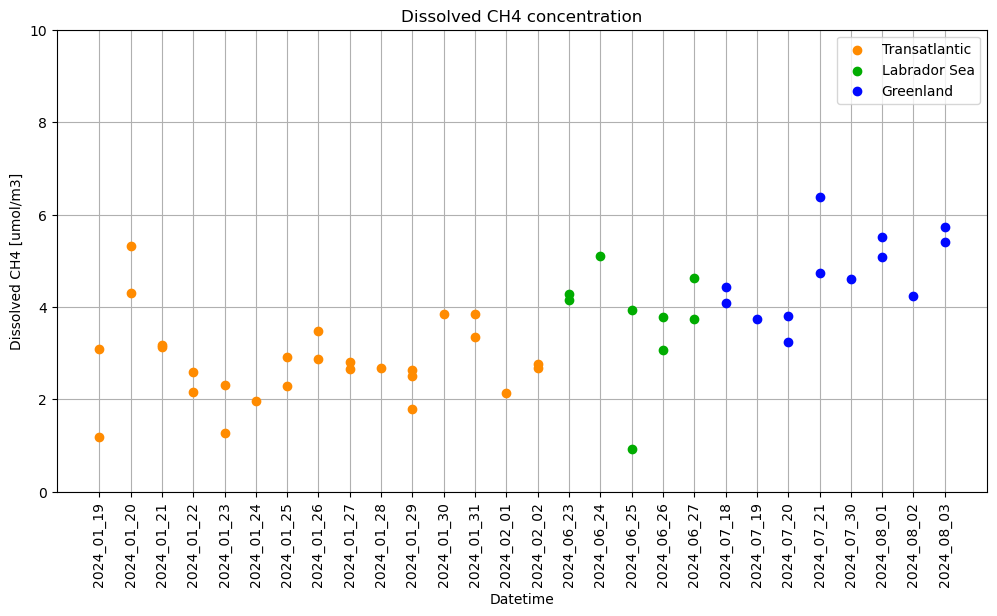

In [12]:
#Overall dissolved CH4 concentration

#datetime_object = pd.to_datetime(data['Datetime'], format='%Y_%m_%d')

# Convert datetime to matplotlib's float format
#x = mdates.date2num(datetime_object)
#y = data['ch4_umolm3']

# Linear regression
#slope, intercept, r_value, p_value, std_err = linregress(x, y)
#regression_line = slope * x + intercept

plt.figure(figsize=(12, 6))
plt.scatter(data['Datetime'][:27], data['ch4_umolm3'][:27], marker='o', color = '#ff8b00', label='Transatlantic', zorder = 2)
plt.scatter(data['Datetime'][27:36], data['ch4_umolm3'][27:36], marker='o', color = '#00ac00', label='Labrador Sea', zorder = 2)
plt.scatter(data['Datetime'][36:], data['ch4_umolm3'][36:], marker='o', color = '#0008ff', label='Greenland', zorder = 2)

# Plot regression line
#plt.plot(data['Datetime'], regression_line, color='black', linewidth=2, label='Linear Regression', zorder=1)

plt.title('Dissolved CH4 concentration')
plt.xlabel('Datetime')
plt.ylabel('Dissolved CH4 [umol/m3]')
plt.ylim(0, 10)
plt.xticks(rotation=90)
plt.grid(True, zorder=0)
plt.legend()

# Export as an image
#plt.savefig(os.path.join('Results', 'Dissolved_CH4.png' ), bbox_inches='tight', dpi=150)

plt.show()

## Map of CO2/CH4 concentration in water

In [13]:
# Compute the mean CO2/CH4 concentration in the water
mean_CO2_mmolm3 = data.groupby('Datetime')['co2_mmolm3'].mean().reset_index()
mean_CO2_mmolm3.rename(columns={'co2_mmolm3': 'mean_CO2_mmolm3'}, inplace=True)
print(mean_CO2_mmolm3)

mean_CH4_umolm3 = data.groupby('Datetime')['ch4_umolm3'].mean().reset_index()
mean_CH4_umolm3.rename(columns={'ch4_umolm3': 'mean_CH4_umolm3'}, inplace=True)
print(mean_CH4_umolm3)

# Merge the mean values back into the original DataFrame
data = data.merge(mean_CO2_mmolm3, on='Datetime', how='left')
data = data.merge(mean_CH4_umolm3, on='Datetime', how='left')
print(data.head())

      Datetime  mean_CO2_mmolm3
0   2024_01_19        18.584750
1   2024_01_20        14.450968
2   2024_01_21        13.370179
3   2024_01_22        13.302776
4   2024_01_23        12.522740
5   2024_01_24        12.130822
6   2024_01_25        13.193601
7   2024_01_26        12.594821
8   2024_01_27        12.845897
9   2024_01_28        11.786288
10  2024_01_29        13.070327
11  2024_01_30        12.308226
12  2024_01_31        12.392334
13  2024_02_01        15.100321
14  2024_02_02        14.210711
15  2024_06_23        15.674980
16  2024_06_24        16.762615
17  2024_06_25        16.485798
18  2024_06_26        17.229679
19  2024_06_27        21.439938
20  2024_07_18        18.838883
21  2024_07_19        17.285678
22  2024_07_20        18.659129
23  2024_07_21        17.083481
24  2024_07_30        20.797619
25  2024_08_01        21.575337
26  2024_08_02        21.519116
27  2024_08_03        22.056406
      Datetime  mean_CH4_umolm3
0   2024_01_19         2.139080
1   2024

C:\Users\lolap\AppData\Local\Temp\ipykernel_30976\1550593483.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('GnBu')


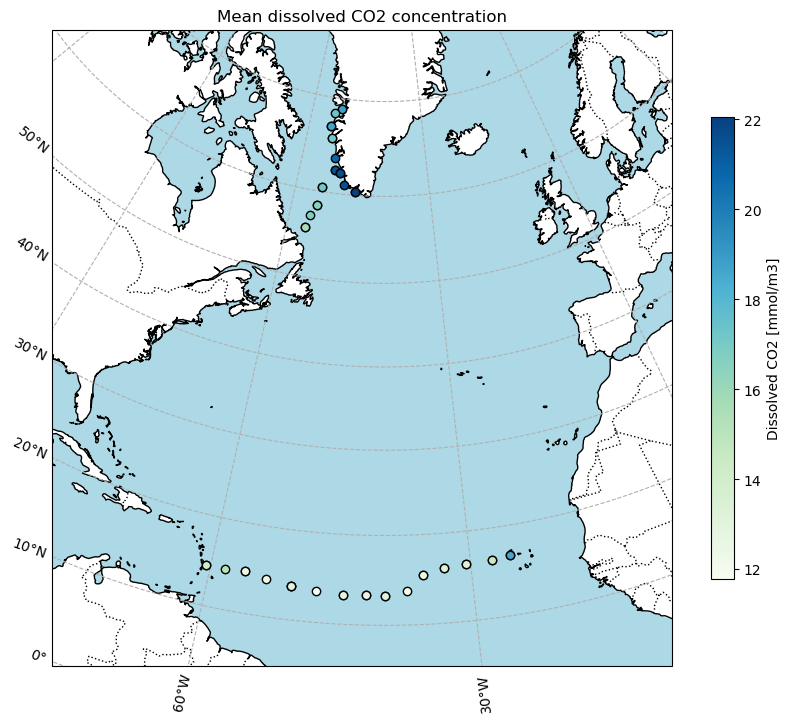

In [14]:
# Dissolved CO2 

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Normalize the concentration values for color scaling
norm = mcolors.Normalize(vmin=data['mean_CO2_mmolm3'].min(), vmax=data['mean_CO2_mmolm3'].max())
colormap = cm.get_cmap('GnBu')

# Plot the GPS points with color depending on concentration
for _, row in data.iterrows():
    rgba = colormap(norm(row['mean_CO2_mmolm3']))  # Get the color based on concentration
    hex_color = mcolors.to_hex(rgba)  # Convert to hex color
    ax.plot(row['Longitude'], row['Latitude'], marker='o', markeredgecolor = 'black', markersize=6, color=hex_color, transform=ccrs.PlateCarree())

# Add colorbar legend
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Needed only for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label('Dissolved CO2 [mmol/m3]')

# Add title
plt.title("Mean dissolved CO2 concentration")

# Export as an image
plt.savefig(os.path.join('Results', 'Map_dissolved_CO2.png' ), bbox_inches='tight', dpi=150)

# Show the plot
plt.show()

C:\Users\lolap\AppData\Local\Temp\ipykernel_30976\1247529451.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('GnBu')


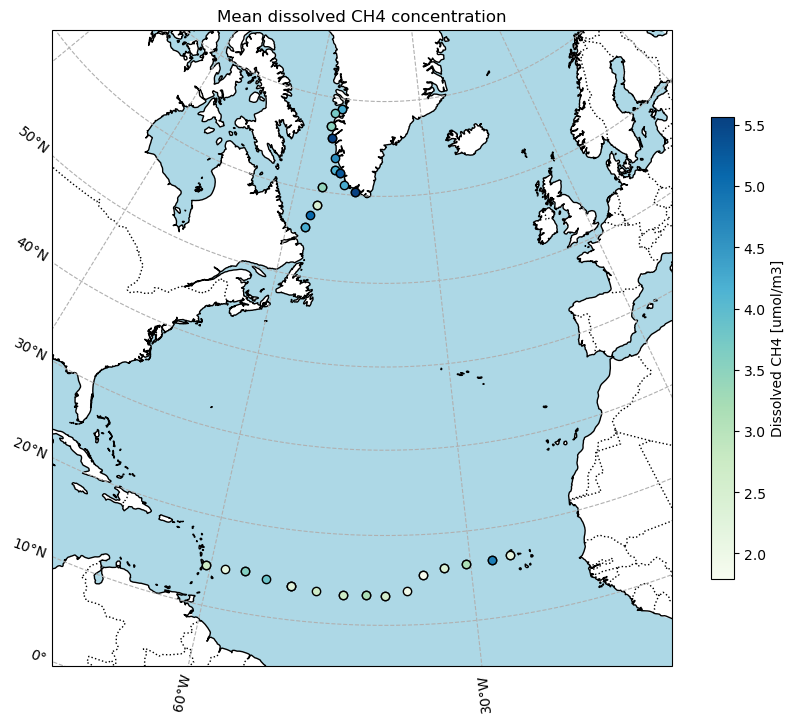

In [15]:
# Dissolved CH4

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Normalize the concentration values for color scaling
norm = mcolors.Normalize(vmin=data['mean_CH4_umolm3'].min(), vmax=data['mean_CH4_umolm3'].max())
colormap = cm.get_cmap('GnBu')

# Plot the GPS points with color depending on concentration
for _, row in data.iterrows():
    rgba = colormap(norm(row['mean_CH4_umolm3']))  # Get the color based on concentration
    hex_color = mcolors.to_hex(rgba)  # Convert to hex color
    ax.plot(row['Longitude'], row['Latitude'], marker='o',  markeredgecolor = 'black', markersize=6, color=hex_color, transform=ccrs.PlateCarree())

# Add colorbar legend
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Needed only for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label('Dissolved CH4 [umol/m3]')

# Add title
plt.title("Mean dissolved CH4 concentration")

# Export as an image
plt.savefig(os.path.join('Results', 'Map_dissolved_CH4.png' ), bbox_inches='tight', dpi=150)

# Show the plot
plt.show()

## Isotopic composition in the water

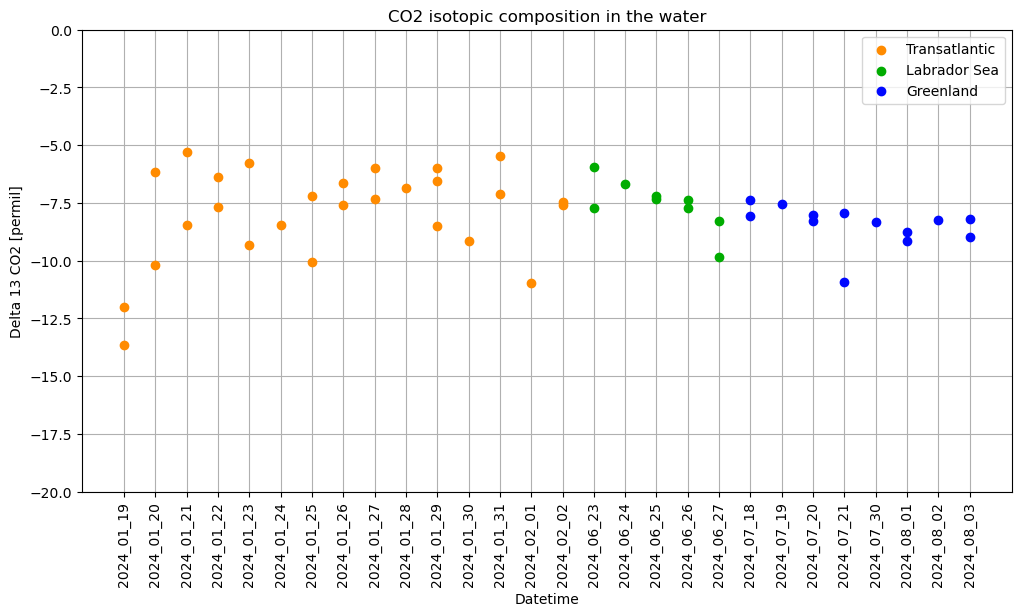

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(data['Datetime'][:27], data['d13_co2_permil'][:27], marker='o', color = '#ff8b00', label='Transatlantic', zorder = 2)
plt.scatter(data['Datetime'][27:36], data['d13_co2_permil'][27:36], marker='o', color = '#00ac00', label='Labrador Sea', zorder = 2)
plt.scatter(data['Datetime'][36:], data['d13_co2_permil'][36:], marker='o', color = '#0008ff', label='Greenland', zorder = 2)

plt.title('CO2 isotopic composition in the water')
plt.xlabel('Datetime')
plt.ylabel('Delta 13 CO2 [permil]')
plt.ylim(-20, 0)
plt.xticks(rotation=90)
plt.grid(True, zorder=0)
plt.legend()

# Export as an image
plt.savefig(os.path.join('Results', 'CO2_iso_comp.png' ), bbox_inches='tight', dpi=150)

plt.show()

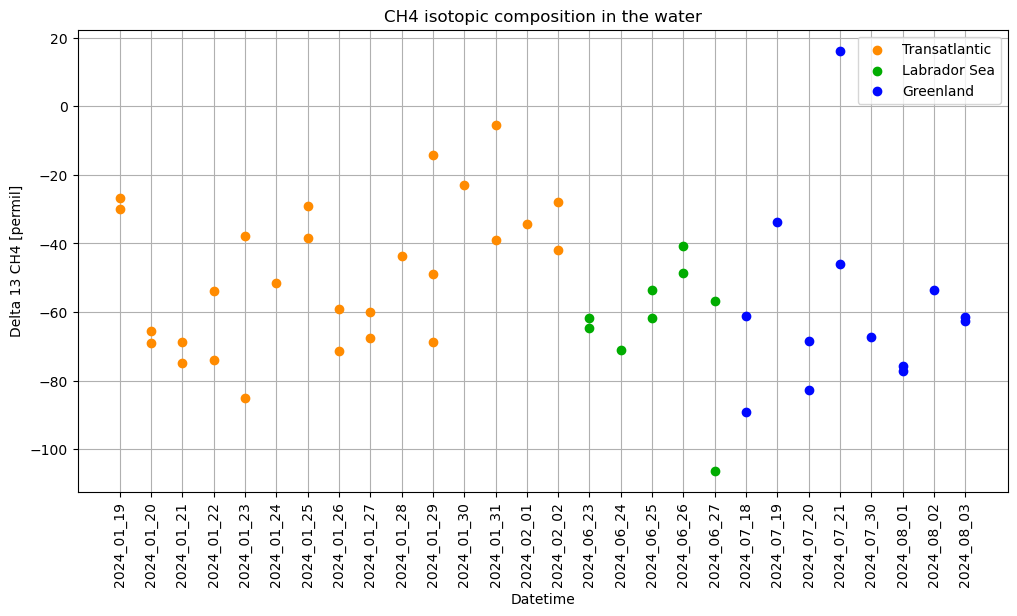

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(data['Datetime'][:27], data['d13_ch4_permil'][:27], marker='o', color = '#ff8b00', label='Transatlantic', zorder = 2)
plt.scatter(data['Datetime'][27:36], data['d13_ch4_permil'][27:36], marker='o', color = '#00ac00', label='Labrador Sea', zorder = 2)
plt.scatter(data['Datetime'][36:], data['d13_ch4_permil'][36:], marker='o', color = '#0008ff', label='Greenland', zorder = 2)

plt.title('CH4 isotopic composition in the water')
plt.xlabel('Datetime')
plt.ylabel('Delta 13 CH4 [permil]')
plt.xticks(rotation=90)
plt.grid(True, zorder=0)
plt.legend()

# Export as an image
plt.savefig(os.path.join('Results', 'CH4_iso_comp.png' ), bbox_inches='tight', dpi=150)

plt.show()

In [18]:
# Compute the mean CO2/CH4 isotopic composition
mean_d13_co2_permil = data.groupby('Datetime')['d13_co2_permil'].mean().reset_index()
mean_d13_co2_permil.rename(columns={'d13_co2_permil': 'mean_d13_co2_permil'}, inplace=True)
print(mean_d13_co2_permil)

mean_d13_ch4_permil = data.groupby('Datetime')['d13_ch4_permil'].mean().reset_index()
mean_d13_ch4_permil.rename(columns={'d13_ch4_permil': 'mean_d13_ch4_permil'}, inplace=True)
print(mean_d13_ch4_permil)

# Merge the mean values back into the original DataFrame
data = data.merge(mean_d13_co2_permil, on='Datetime', how='left')
data = data.merge(mean_d13_ch4_permil, on='Datetime', how='left')
print(data.head())

      Datetime  mean_d13_co2_permil
0   2024_01_19           -12.839048
1   2024_01_20            -8.166648
2   2024_01_21            -6.880357
3   2024_01_22            -7.018129
4   2024_01_23            -7.543558
5   2024_01_24            -8.453511
6   2024_01_25            -8.640258
7   2024_01_26            -7.114821
8   2024_01_27            -6.664209
9   2024_01_28            -6.868769
10  2024_01_29            -7.008878
11  2024_01_30            -9.128328
12  2024_01_31            -6.284467
13  2024_02_01           -10.984822
14  2024_02_02            -7.529484
15  2024_06_23            -6.825595
16  2024_06_24            -6.666750
17  2024_06_25            -7.256263
18  2024_06_26            -7.549973
19  2024_06_27            -9.052987
20  2024_07_18            -7.717389
21  2024_07_19            -7.546883
22  2024_07_20            -8.139753
23  2024_07_21            -9.435501
24  2024_07_30            -8.308994
25  2024_08_01            -8.941557
26  2024_08_02            -8

C:\Users\lolap\AppData\Local\Temp\ipykernel_30976\3747248500.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('GnBu_r')


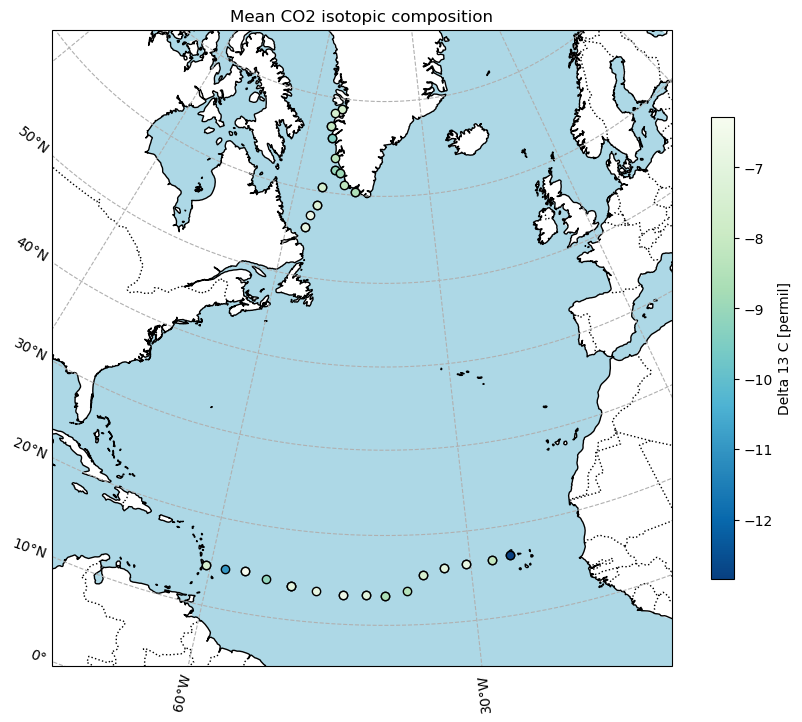

In [19]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Normalize the concentration values for color scaling
norm = mcolors.Normalize(vmin=data['mean_d13_co2_permil'].min(), vmax=data['mean_d13_co2_permil'].max())
colormap = cm.get_cmap('GnBu_r')

# Plot the GPS points with color depending on concentration
for _, row in data.iterrows():
    rgba = colormap(norm(row['mean_d13_co2_permil']))  # Get the color based on concentration
    hex_color = mcolors.to_hex(rgba)  # Convert to hex color
    ax.plot(row['Longitude'], row['Latitude'], marker='o', markeredgecolor = 'black', markersize=6, color=hex_color, transform=ccrs.PlateCarree())

# Add colorbar legend
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Needed only for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label('Delta 13 C [permil]')

# Add title
plt.title("Mean CO2 isotopic composition")

# Show the plot
plt.show()

C:\Users\lolap\AppData\Local\Temp\ipykernel_30976\3422799281.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('GnBu_r')


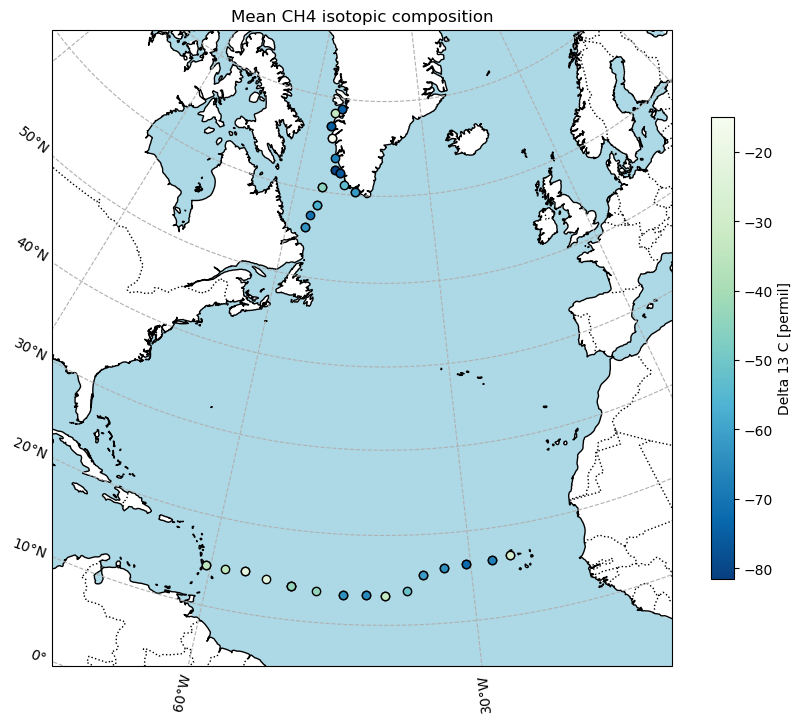

In [20]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Normalize the concentration values for color scaling
norm = mcolors.Normalize(vmin=data['mean_d13_ch4_permil'].min(), vmax=data['mean_d13_ch4_permil'].max())
colormap = cm.get_cmap('GnBu_r')

# Plot the GPS points with color depending on concentration
for _, row in data.iterrows():
    rgba = colormap(norm(row['mean_d13_ch4_permil']))  # Get the color based on concentration
    hex_color = mcolors.to_hex(rgba)  # Convert to hex color
    ax.plot(row['Longitude'], row['Latitude'], marker='o', markeredgecolor = 'black', markersize=6, color=hex_color, transform=ccrs.PlateCarree())

# Add colorbar legend
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Needed only for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label('Delta 13 C [permil]')

# Add title
plt.title("Mean CH4 isotopic composition")

# Show the plot
plt.show()

## Isotopic composition in the atmosphere

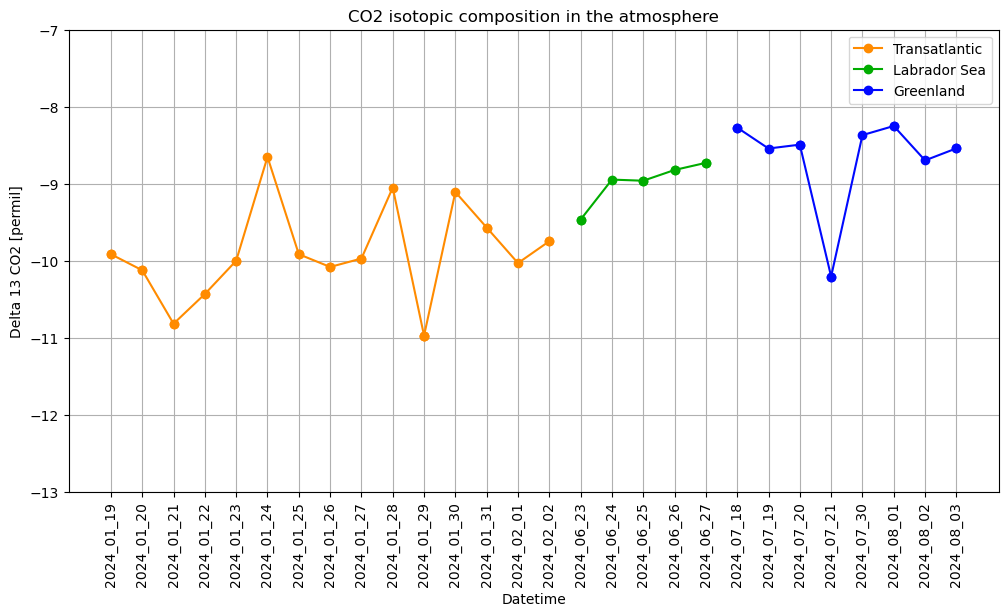

In [21]:
# CO2
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'][:27], data['d13C_CO2atm_permil'][:27], marker='o', color = '#ff8b00', label='Transatlantic', zorder = 2)
plt.plot(data['Datetime'][27:36], data['d13C_CO2atm_permil'][27:36], marker='o', color = '#00ac00', label='Labrador Sea', zorder = 2)
plt.plot(data['Datetime'][36:], data['d13C_CO2atm_permil'][36:], marker='o', color = '#0008ff', label='Greenland', zorder = 2)

plt.title('CO2 isotopic composition in the atmosphere')
plt.xlabel('Datetime')
plt.ylabel('Delta 13 CO2 [permil]')
plt.ylim(-13, -7)
plt.xticks(rotation=90)
plt.grid(True, zorder=0)
plt.legend()

# Export as an image
plt.savefig(os.path.join('Results', 'CO2atm_iso_comp.png' ), bbox_inches='tight', dpi=150)

plt.show()

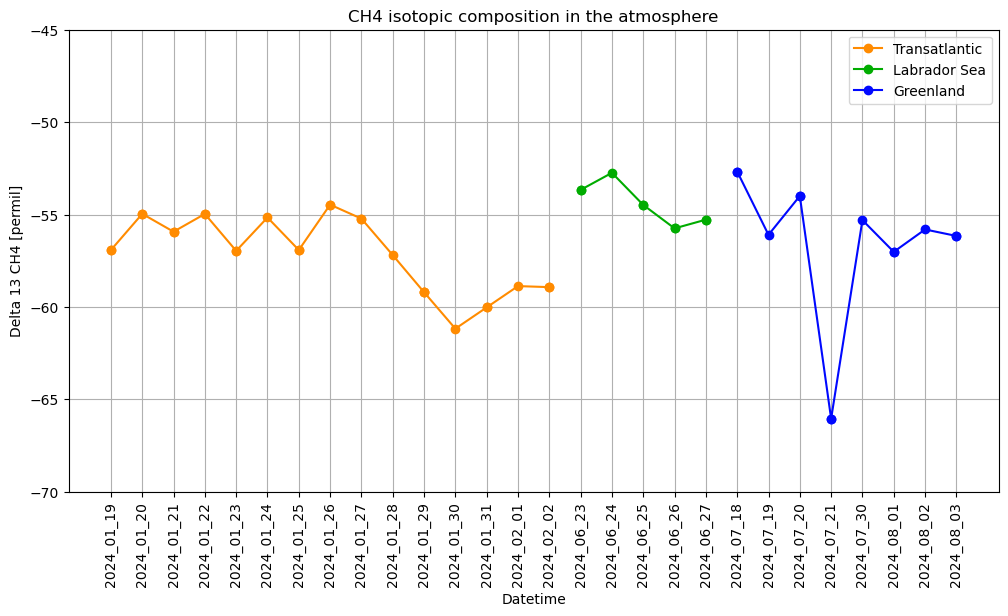

In [22]:
# CH4
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'][:27], data['d13C_CH4atm_permil'][:27], marker='o', color = '#ff8b00', label='Transatlantic', zorder = 2)
plt.plot(data['Datetime'][27:36], data['d13C_CH4atm_permil'][27:36], marker='o', color = '#00ac00', label='Labrador Sea', zorder = 2)
plt.plot(data['Datetime'][36:], data['d13C_CH4atm_permil'][36:], marker='o', color = '#0008ff', label='Greenland', zorder = 2)

plt.title('CH4 isotopic composition in the atmosphere')
plt.xlabel('Datetime')
plt.ylabel('Delta 13 CH4 [permil]')
plt.ylim(-70, -45)
plt.xticks(rotation=90)
plt.grid(True, zorder=0)
plt.legend()

# Export as an image
plt.savefig(os.path.join('Results', 'CH4atm_iso_comp.png' ), bbox_inches='tight', dpi=150)

plt.show()

## Water Temperature VS Salinity

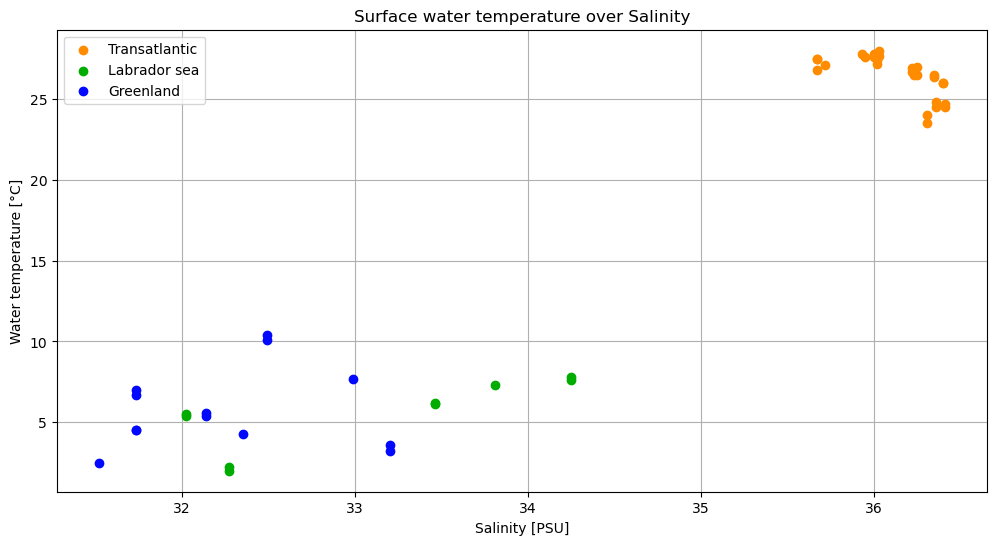

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(data['sal_psu'][:27], metadata['Tw_b [°C]'][:27], marker='o', color = '#ff8b00', label = "Transatlantic", zorder = 2)
plt.scatter(data['sal_psu'][27:36], metadata['Tw_b [°C]'][27:36], marker='o', color = '#00ac00', label = "Labrador sea", zorder = 2)
plt.scatter(data['sal_psu'][36:], metadata['Tw_b [°C]'][36:], marker='o', color = '#0008ff', label = "Greenland", zorder = 2)

plt.title('Surface water temperature over Salinity')
plt.xlabel('Salinity [PSU]')
plt.ylabel('Water temperature [°C]')
plt.grid(True, zorder=0)
plt.legend()

# Export as an image
plt.savefig(os.path.join('Results', 'Tw_VS_salinity.png' ), bbox_inches='tight', dpi=150)

plt.show()

## Map of some environnmental variables

### Salinity

C:\Users\lolap\AppData\Local\Temp\ipykernel_30976\3752687106.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('GnBu')


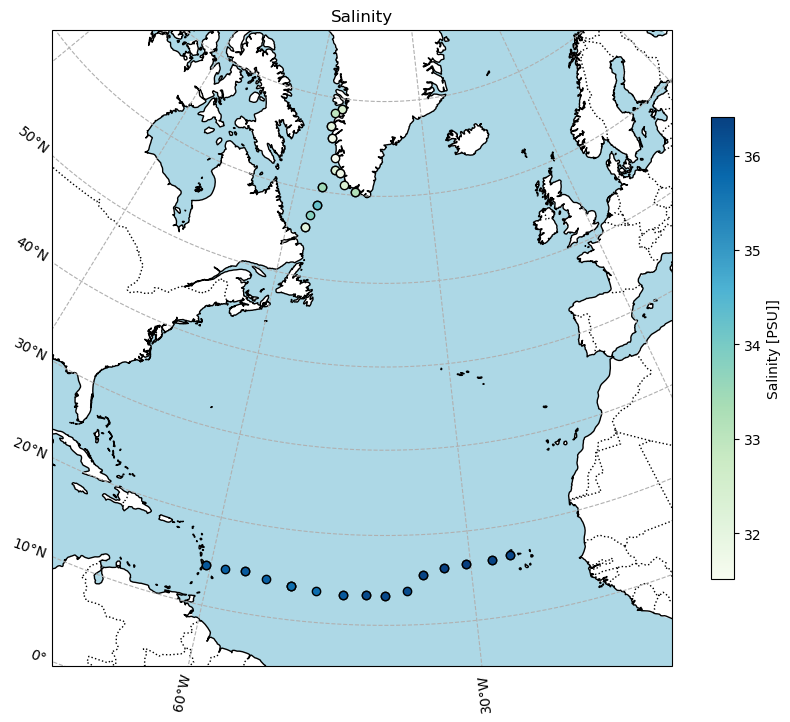

In [24]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Normalize the concentration values for color scaling
norm = mcolors.Normalize(vmin=data['sal_psu'].min(), vmax=data['sal_psu'].max())
colormap = cm.get_cmap('GnBu')

# Plot the GPS points with color depending on concentration
for _, row in data.iterrows():
    rgba = colormap(norm(row['sal_psu']))  # Get the color based on concentration
    hex_color = mcolors.to_hex(rgba)  # Convert to hex color
    ax.plot(row['Longitude'], row['Latitude'], marker='o', markeredgecolor = 'black', markersize=6, color=hex_color, transform=ccrs.PlateCarree())

# Add colorbar legend
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Needed only for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label('Salinity [PSU]]')

# Add title
plt.title("Salinity")

# Export as an image
plt.savefig(os.path.join('Results', 'Salinity.png' ), bbox_inches='tight', dpi=150)

# Show the plot
plt.show()

### Temperature of the water

C:\Users\lolap\AppData\Local\Temp\ipykernel_30976\2964706360.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('GnBu')


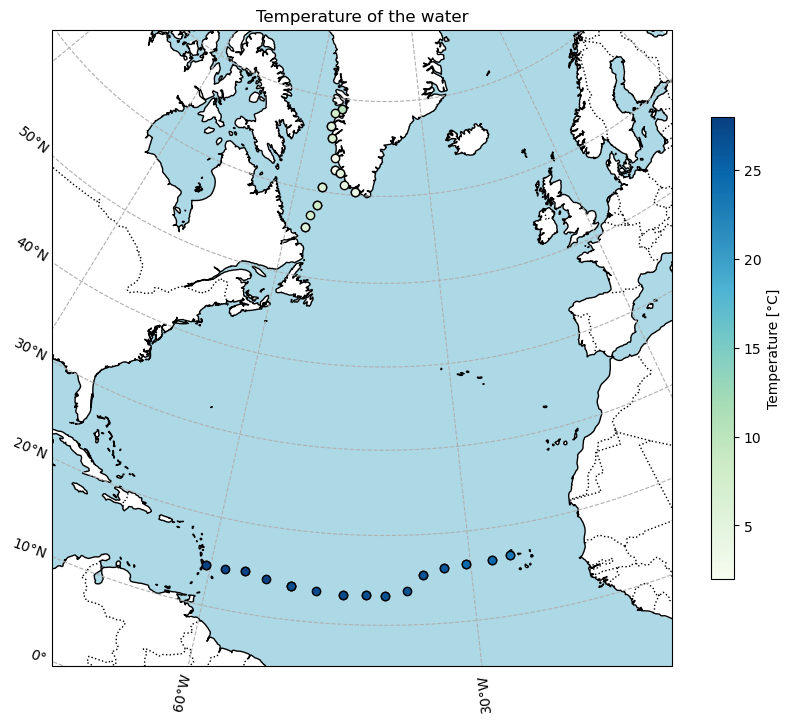

In [25]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Normalize the concentration values for color scaling
norm = mcolors.Normalize(vmin=metadata['Tw_b [°C]'].min(), vmax=metadata['Tw_b [°C]'].max())
colormap = cm.get_cmap('GnBu')

# Plot the GPS points with color depending on concentration
for _, row in metadata.iterrows():
    rgba = colormap(norm(row['Tw_b [°C]']))  # Get the color based on concentration
    hex_color = mcolors.to_hex(rgba)  # Convert to hex color
    ax.plot(row['Longitude'], row['Latitude'], marker='o', markeredgecolor = 'black', markersize=6, color=hex_color, transform=ccrs.PlateCarree())

# Add colorbar legend
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Needed only for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label('Temperature [°C]')

# Add title
plt.title("Temperature of the water")

# Export as an image
plt.savefig(os.path.join('Results', 'Water_T.png' ), bbox_inches='tight', dpi=150)

# Show the plot
plt.show()

### Wind speed

In [35]:
# Some data are ranges --> creation of min and max column and then comput the mean
# Function to extract min and max wind speed
def WS_min_max(wind_speed):
    if isinstance(wind_speed, str) and '-' in wind_speed:  # Check if it's a range
        min_val, max_val = map(float, wind_speed.split('-'))  # Split and convert to float
    else:
        min_val = max_val = float(wind_speed)  # If it's a single number
    return pd.Series([min_val, max_val])

# Apply function to create new columns
metadata[['Min_Wind_Speed [kts]', 'Max_Wind_Speed [kts]']] = metadata['TWS [kts]'].apply(WS_min_max)
mean_WS = np.mean([metadata['Min_Wind_Speed [kts]'], metadata['Max_Wind_Speed [kts]']], axis = 0)
metadata['Mean_Wind_Speed [kts]'] = mean_WS

# Display the first rows
print(metadata.head())

         Sample_Name   Latitude  Longitude TWS [kts]  SOG [kts]  P_atm [hPa]  \
0  SLWT_2024_01_19_A  16.625000 -25.325000         7        4.5       1016.0   
1  SLWT_2024_01_19_B  16.625000 -25.325000         7        4.5       1016.0   
2  SLWT_2024_01_20_A  16.401667 -27.518333        16        7.6       1014.7   
3  SLWT_2024_01_20_B  16.401667 -27.518333        16        7.6       1014.7   
4  SLWT_2024_01_21_A  16.316667 -30.581667        19        7.5       1014.9   

   T_air [°C]   pH  Tw_b [°C]  Tw_a [°C] Mer [Douglas]  \
0        24.5  7.5       24.0       23.5             3   
1        24.5  7.5       23.5       23.5             3   
2        23.5  7.5       24.8       25.4           3-4   
3        23.5  7.5       24.5       25.2           3-4   
4        25.0  7.5       24.7       25.3             3   

                           Remarks  Min_Wind_Speed [kts]  \
0  Air pressure from NOAA archives                   7.0   
1  Air pressure from NOAA archives                

C:\Users\lolap\AppData\Local\Temp\ipykernel_30976\3630925842.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('jet')


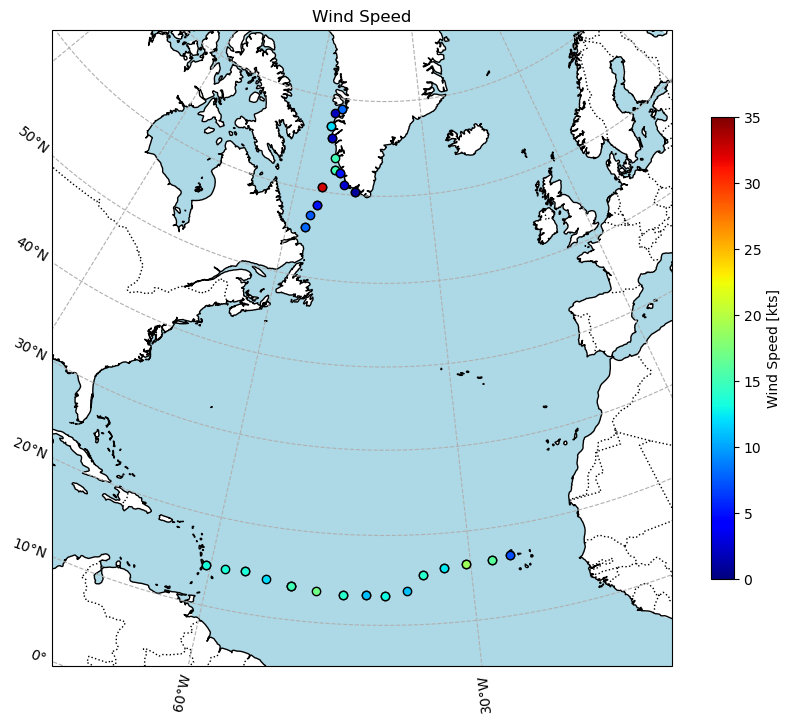

In [27]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Normalize the concentration values for color scaling
norm = mcolors.Normalize(vmin=0, vmax=35)
colormap = cm.get_cmap('jet')

# Plot the GPS points with color depending on concentration
for _, row in metadata.iterrows():
    rgba = colormap(norm(row['Mean_Wind_Speed [kts]']))  # Get the color based on concentration
    hex_color = mcolors.to_hex(rgba)  # Convert to hex color
    ax.plot(row['Longitude'], row['Latitude'], marker='o', markeredgecolor = 'black', markersize=6, color=hex_color, transform=ccrs.PlateCarree())

# Add colorbar legend
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Needed only for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label('Wind Speed [kts]')

# Add title
plt.title("Wind Speed")

# Export as an image
plt.savefig(os.path.join('Results', 'Wind_Speed.png' ), bbox_inches='tight', dpi=150)

# Show the plot
plt.show()